# Test for coastal conditions 

In [ ]:
import xarray as xr 
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib

In [2]:
bathy = xr.open_dataset("/bettik/bellemva/sad/Bathymetry_hawai.nc")

In [3]:
bathy = bathy.coarsen(lon=5,lat=5).mean()

In [4]:
mask_coast = (bathy.elevation.values>=0).astype('int')

In [5]:
grad_x,grad_y = np.gradient(mask_coast)

In [8]:
mask_coast.shape

(960, 960)

In [6]:
grad_x.shape

(960, 960)

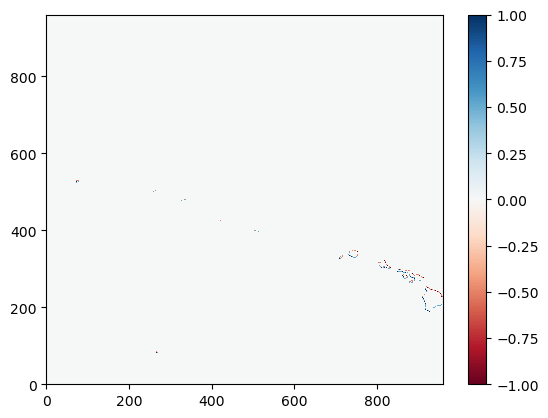

In [11]:
plt.pcolormesh(grad_x+grad_y,cmap="RdBu")
plt.colorbar()

In [14]:
mask_bool = mask_coast.astype('bool')

In [44]:
def detect_coast(mask,axis="x"):
    if axis == "x": 
        a1 = mask[:,1:]
        a2 = mask[:,:-1]
    elif axis == "y": 
        a1 = mask[1:,:]
        a2 = mask[:-1,:]
    p1 = np.logical_and(a1,np.invert(a2))
    p2 = np.logical_and(a2,np.invert(a1))
    return np.logical_or(p1,p2)

In [21]:
detect_coast(mask_bool[:-1],mask_bool[1:])

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

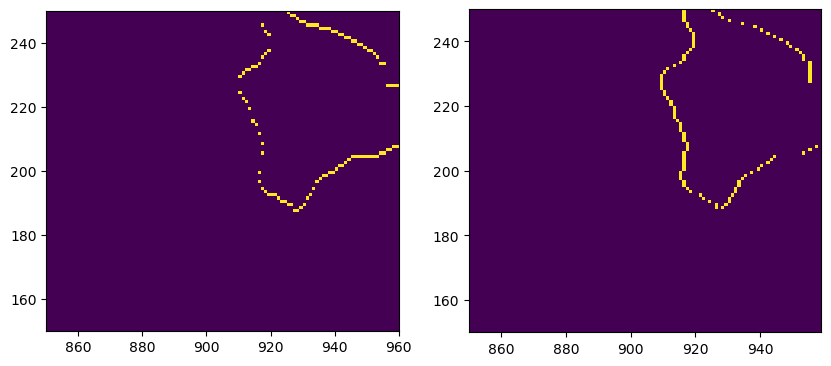

In [36]:
fig,ax = plt.subplots(1,2,figsize=(10,5))

ax[0].pcolormesh(detect_coast(mask_bool[:-1,:],mask_bool[1:,:]))
ax[0].set_xlim(850,)
ax[0].set_ylim(150,250)
ax[0].set_aspect("equal")

ax[1].pcolormesh(detect_coast(mask_bool[:,:-1],mask_bool[:,1:]))
ax[1].set_xlim(850,)
ax[1].set_ylim(150,250)
ax[1].set_aspect("equal")


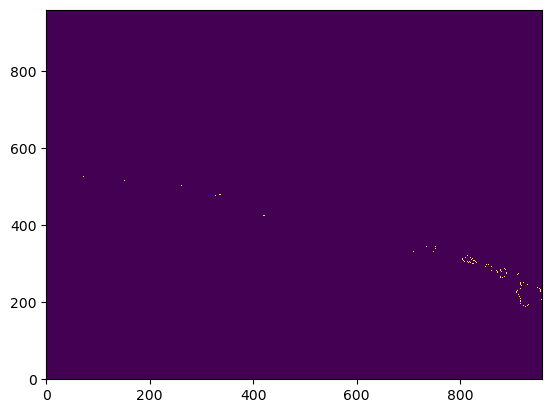

In [25]:
plt.pcolormesh(detect_coast(mask_bool[:,:-1],mask_bool[:,1:]))

In [37]:
test_mask = np.array([[False,True,True],
                     [False,True,True],
                     [False,False,True]])
y_coast = detect_coast(test_mask)

In [43]:
detect_coast(test_mask,"x")

array([[ True, False],
       [ True, False],
       [False,  True]])

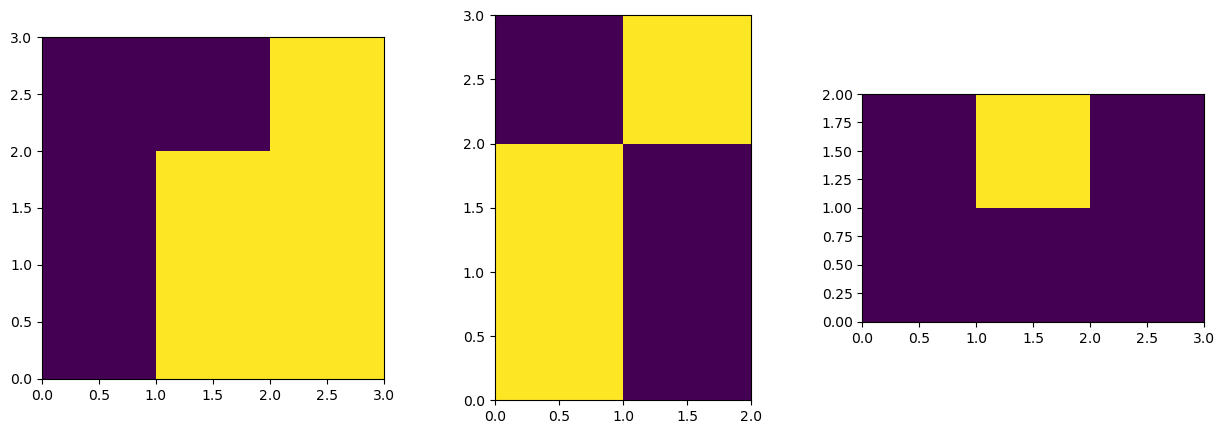

In [45]:
fig,ax = plt.subplots(1,3,figsize = (15,5))
ax[0].pcolormesh(test_mask)
ax[0].set_aspect("equal")

ax[1].pcolormesh(detect_coast(test_mask,"x"))
ax[1].set_aspect("equal")

ax[2].pcolormesh(detect_coast(test_mask,"y"))
ax[2].set_aspect("equal")

## Mask computing 

These lines compute and creat the netcdf file of a mask 

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
longitude = np.arange(185,205+1/12,1/12)
latitude = np.arange(15,35+1/12,1/12)
mask_test_array = np.zeros((latitude.size,longitude.size),dtype='float')
mask_test_array[80:-80,80:-80]=np.nan
mask_test = xr.Dataset(data_vars=dict(
    mask=(["latitude", "longitude"], mask_test_array),),
    coords=dict(
    longitude=(["longitude"], longitude),
    latitude=(["latitude"], latitude),
    ))
mask_test.to_netcdf("./mask/mask_square.nc")

In [4]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
longitude = np.arange(185,205+1/12,1/12)
latitude = np.arange(15,35+1/12,1/12)
mask_test_array = np.zeros((latitude.size,longitude.size),dtype='float')
mask_test_array[115:125,115:125]=np.nan
mask_test = xr.Dataset(data_vars=dict(
    mask=(["latitude", "longitude"], mask_test_array),),
    coords=dict(
    longitude=(["longitude"], longitude),
    latitude=(["latitude"], latitude),
    ))
mask_test.to_netcdf("./mask/mask_square_small.nc")

In [3]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
longitude = np.arange(0,11+1,1)
latitude = np.arange(0,11+1,1)
mask_test_array = np.zeros((latitude.size,longitude.size),dtype='float')
mask_test_array[4:,4:8]=np.nan
mask_test = xr.Dataset(data_vars=dict(
    mask=(["latitude", "longitude"], mask_test_array),),
    coords=dict(
    longitude=(["longitude"], longitude),
    latitude=(["latitude"], latitude),
    ))
mask_test.to_netcdf("./mask/mask_test.nc")

In [4]:
mask_test_array

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., nan, nan, nan, nan,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., nan, nan, nan, nan,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., nan, nan, nan, nan,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., nan, nan, nan, nan,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., nan, nan, nan, nan,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., nan, nan, nan, nan,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., nan, nan, nan, nan,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., nan, nan, nan, nan,  0.,  0.,  0.,  0.]])

In [11]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
longitude = np.arange(185,205+1/12,1/12)
latitude = np.arange(15,35+1/12,1/12)
lat2d,lon2d = np.meshgrid(latitude,longitude)
mask_round = np.sqrt((lat2d-25)**2+(lon2d-195)**2)<=3
mask_array = np.zeros((latitude.size,longitude.size),dtype='float')
mask_array[mask_round]=np.nan
ds_mask = xr.Dataset(data_vars=dict(
    mask=(["latitude", "longitude"], mask_array),),
    coords=dict(
    longitude=(["longitude"], longitude),
    latitude=(["latitude"], latitude),
    ))
ds_mask.to_netcdf("./mask/mask_round.nc")


In [ ]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
longitude = np.arange(185,205+1/12,1/12)
latitude = np.arange(15,35+1/12,1/12)
lat2d,lon2d = np.meshgrid(latitude,longitude)
mask_round = np.sqrt((lat2d-25)**2+(lon2d-195)**2)<=3
mask_array = np.zeros((latitude.size,longitude.size),dtype='float')
mask_array[mask_round]=np.nan
ds_mask = xr.Dataset(data_vars=dict(
    mask=(["latitude", "longitude"], mask_array),),
    coords=dict(
    longitude=(["longitude"], longitude),
    latitude=(["latitude"], latitude),
    ))
ds_mask.to_netcdf("./mask/mask_round.nc")

In [4]:
mask_test.mask

<xarray.DataArray 'mask' (latitude: 10, longitude: 10)>
array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., nan, nan, nan, nan,  0.,  0.,  0.],
       [ 0.,  0.,  0., nan, nan, nan, nan,  0.,  0.,  0.],
       [ 0.,  0.,  0., nan, nan, nan, nan,  0.,  0.,  0.],
       [ 0.,  0.,  0., nan, nan, nan, nan,  0.,  0.,  0.],
       [ 0.,  0.,  0., nan, nan, nan, nan,  0.,  0.,  0.],
       [ 0.,  0.,  0., nan, nan, nan, nan,  0.,  0.,  0.]])
Coordinates:
  * longitude  (longitude) int64 0 1 2 3 4 5 6 7 8 9
  * latitude   (latitude) int64 0 1 2 3 4 5 6 7 8 9

In [ ]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
longitude = np.arange(0,3,1)
latitude = np.arange(0,6,1)
mask_test_array = np.zeros((latitude.size,longitude.size),dtype='float')
mask_test_array[4,1]=np.nan
mask_test = xr.Dataset(data_vars=dict(
    mask=(["latitude", "longitude"], mask_test_array),),
    coords=dict(
    longitude=(["longitude"], longitude),
    latitude=(["latitude"], latitude),
    ))
mask_test.to_netcdf("./mask/mask_tiny.nc")

()
1
